In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn import preprocessing
import seaborn as sns
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [26]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']


In [28]:
titanic.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)


In [29]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [30]:
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)


In [31]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [32]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [33]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

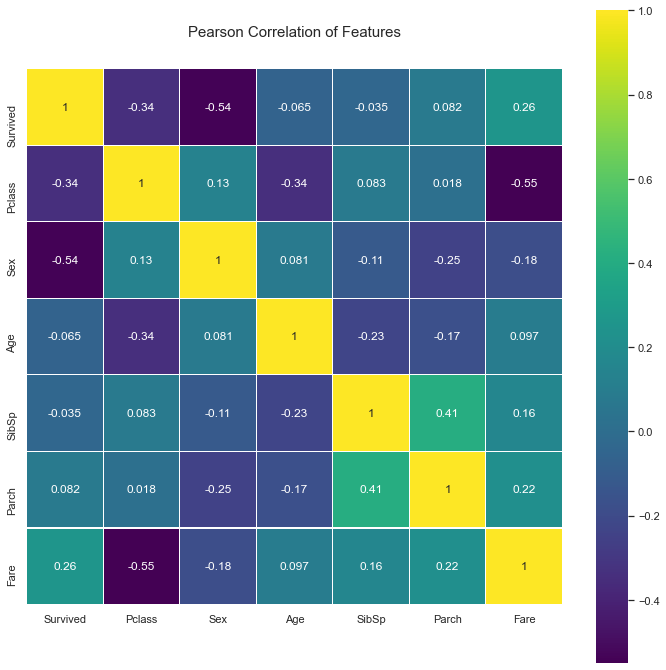

In [34]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [36]:
x = titanic.iloc[:,1:]
print(x)
y = titanic['Survived']

y

     Pclass  Sex   Age  SibSp  Parch     Fare
0         3    1  22.0      1      0   7.2500
1         1    0  38.0      1      0  71.2833
2         3    0  26.0      0      0   7.9250
3         1    0  35.0      1      0  53.1000
4         3    1  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    1  27.0      0      0  13.0000
887       1    0  19.0      0      0  30.0000
888       3    0  28.0      1      2  23.4500
889       1    1  26.0      0      0  30.0000
890       3    1  32.0      0      0   7.7500

[891 rows x 6 columns]


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [38]:
vif

,VIF Factor,features
0,4.584861,Pclass
1,3.020367,Sex
2,4.206171,Age
3,1.559522,SibSp
4,1.602030,Parch
5,1.668794,Fare


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=22)


In [23]:
# For visualization 

!pip install graphviz

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
ypred = dt.predict(x_test)

In [42]:
ypred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [43]:
import pickle
with open('decision_tree.pickle', 'wb') as f:
    pickle.dump(dt, f)

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [46]:
conf_metrics = confusion_matrix(y_test, ypred)
conf_metrics

array([[87, 23],
       [13, 56]], dtype=int64)

In [47]:
# matric creation 
true_positive = conf_metrics[0][0]
false_postive = conf_metrics[0][1]
false_negative = conf_metrics[1][0]
true_negative = conf_metrics[1][1]

In [48]:
accuracy = (true_negative + true_negative) / (true_negative + true_positive + false_negative + false_postive)
accuracy

0.6256983240223464

In [49]:
precision = (true_positive) / (true_positive + false_postive)
precision

0.7909090909090909

In [51]:
recall = (true_positive) / (true_positive + false_negative)
recall 

0.87

In [52]:
f1_score = 2 * (precision * recall)/ (precision + recall)
f1_score

0.8285714285714286

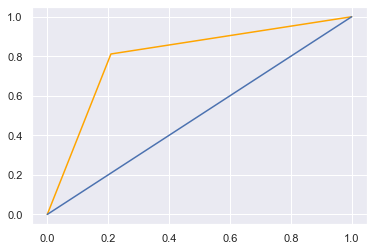

In [54]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test, ypred)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1])
plt.show()

In [58]:
feature_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']

In [63]:
# Tree construction

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

"# Tree construction\n\nfrom sklearn.tree import export_graphviz\nfrom six import StringIO\nfrom IPython.display import Image  \nimport pydotplus\n\ndot_data = StringIO()\nexport_graphviz(dt, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True,feature_names = feature_cols,class_names=['0','1'])\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png('diabetes.png')\nImage(graph.create_png())"

In [61]:
!pip install graphviz